In [2]:
import os
import numpy as np

In [3]:
def diffraction_limit(wavelength, NA):
    return np.divide(wavelength, np.multiply(2., NA))

In [33]:
diffraction_limit(0.520, 1.49)

0.174496644295302

In [65]:
def simulate_single_psf(sigma_psf, pixel_size):
    n_pixels = 20*int(np.divide(sigma_psf, pixel_size))
    x = np.multiply(pixel_size, np.linspace(-np.divide(n_pixels, 2.), np.divide(n_pixels, 2.), n_pixels+1))
    X, Y = np.meshgrid(x, x)
    PSF = np.exp(-(np.square(X)/np.multiply(2, np.square(sigma_psf))) - (np.square(Y)/np.multiply(2, np.square(sigma_psf))))  
    return PSF

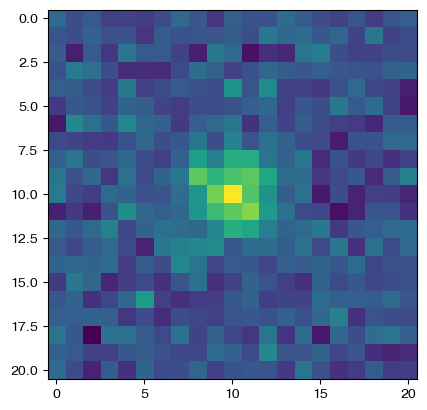

In [84]:
import matplotlib.pyplot as plt
sing_psf = simulate_single_psf(0.175, 0.11)
sing_psf_poiss = np.random.poisson(129*sing_psf) + np.random.poisson(np.full_like(sing_psf, 200)) + np.random.normal(loc=1, scale=0.1, size=sing_psf.shape)
plt.imshow(sing_psf_poiss)

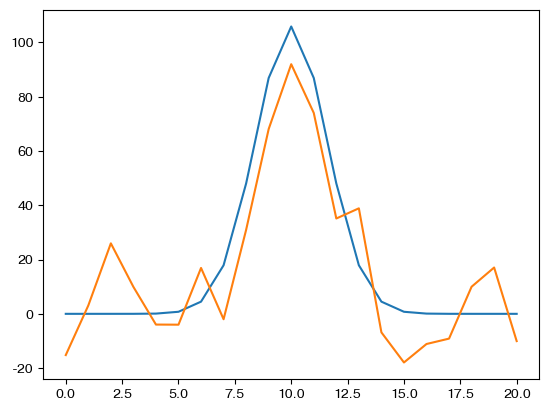

In [85]:
plt.plot(129*sing_psf[:, 9])
plt.plot(sing_psf_poiss[:,9])